# --------Tumor Detector -------
## 215548M - RSU Rajapaksha

Libraries

In [ ]:
!pip install -U xgboost==1.7.6 scikit-learn==1.3.0

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,)
from xgboost import XGBClassifier
from sklearn.model_selection import (train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV,)
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,classification_report,)
import xgboost as xgb
import sklearn

import warnings
warnings.filterwarnings('ignore')

---

# Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/ACA/ml2/Brain Tumor/Brain Tumor.csv'
data = pd.read_csv(file_path)

Mounted at /content/drive


## Checking the dataset

In [ ]:
# Print rows
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0      1      0  6.535339   619.587845           24.891522  0.109059   
1      2      0  8.749969   805.957634           28.389393  0.266538   
2      3      1  7.341095  1143.808219           33.820234  0.001467   
3      4      1  5.958145   959.711985           30.979219  0.001477   
4      5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation  Unnamed: 14  
0       4.473346     0.981939          NaN  
1       3.220072     

### Dataset Colomns

Image:

    Likely a unique identifier for each image in the dataset.
    Could be a filename or an index pointing to the image source.

Class:

    The target variable indicating whether the image contains a tumor (1) or is healthy (0).

Mean:

    The average pixel intensity across the image or a specific region of interest.

Variance:

    Measures the spread of pixel intensities, indicating how much they deviate from the mean.

Standard Deviation:

    A statistical measure of pixel intensity variation, derived from the square root of the variance.

Entropy:

    Represents the randomness or complexity in the image. High entropy could indicate more texture or complexity.

Skewness:

    Describes the asymmetry of the pixel intensity distribution. A skewed distribution can highlight areas with abnormal brightness.

Kurtosis:

    Measures the "peakedness" or flatness of the pixel intensity distribution. High kurtosis suggests sharp peaks, while low kurtosis indicates flatness.

Contrast:

    Quantifies the difference in intensity between the brightest and darkest parts of the image, often used to highlight texture.

Energy:

    A texture measure derived from the image's gray-level co-occurrence matrix (GLCM), indicating uniformity. High energy suggests homogeneous regions.

ASM (Angular Second Moment):

    Also called "energy" in some contexts, it measures textural uniformity from the GLCM. High ASM indicates less texture variation.

Homogeneity:

    Measures the similarity of pixel intensities in the image. High homogeneity indicates smoother regions.

Dissimilarity:

    Quantifies the variation in pixel intensities, often the opposite of homogeneity. High dissimilarity indicates more texture.

Correlation:

    Measures the relationship between pixel pairs in the image, capturing patterns and dependencies.

In [ ]:


#shape
print("\nShape of the dataset:", data.shape)


Shape of the dataset: (3762, 15)


In [ ]:
#basic information
print("\nBasic information about the dataset:")
print(data.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   int64  
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Unnamed: 14         0 non-null      float64
dtypes: float64(13), i

---
## Cleaning

In [ ]:
# Check for null values
print("\nNull values in the dataset:")
print(data.isnull().sum())



Null values in the dataset:
Image                    0
Class                    0
Mean                     0
Variance                 0
Standard Deviation       0
Entropy                  0
Skewness                 0
Kurtosis                 0
Contrast                 0
Energy                   0
ASM                      0
Homogeneity              0
Dissimilarity            0
Correlation              0
Unnamed: 14           3762
dtype: int64


*                                           No null values

In [ ]:
# Remove duplicates
data = data.drop_duplicates()
print("\nShape of the dataset after removing duplicates:", data.shape)



Shape of the dataset after removing duplicates: (3762, 15)


In [ ]:
# Remove the last unnamed column
if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)

data = data.iloc[:, :-1]

In [ ]:
# Print
print(data.columns)

Index(['Image', 'Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation'],
      dtype='object')


In [ ]:
print(data.head())

   Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0      1      0  6.535339   619.587845           24.891522  0.109059   
1      2      0  8.749969   805.957634           28.389393  0.266538   
2      3      1  7.341095  1143.808219           33.820234  0.001467   
3      4      1  5.958145   959.711985           30.979219  0.001477   
4      5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation  
0       4.473346     0.981939  
1       3.220072     0.988834  
2       5.981800     0.978014  
3       7.70

---

## Visualizing

### Boxplots

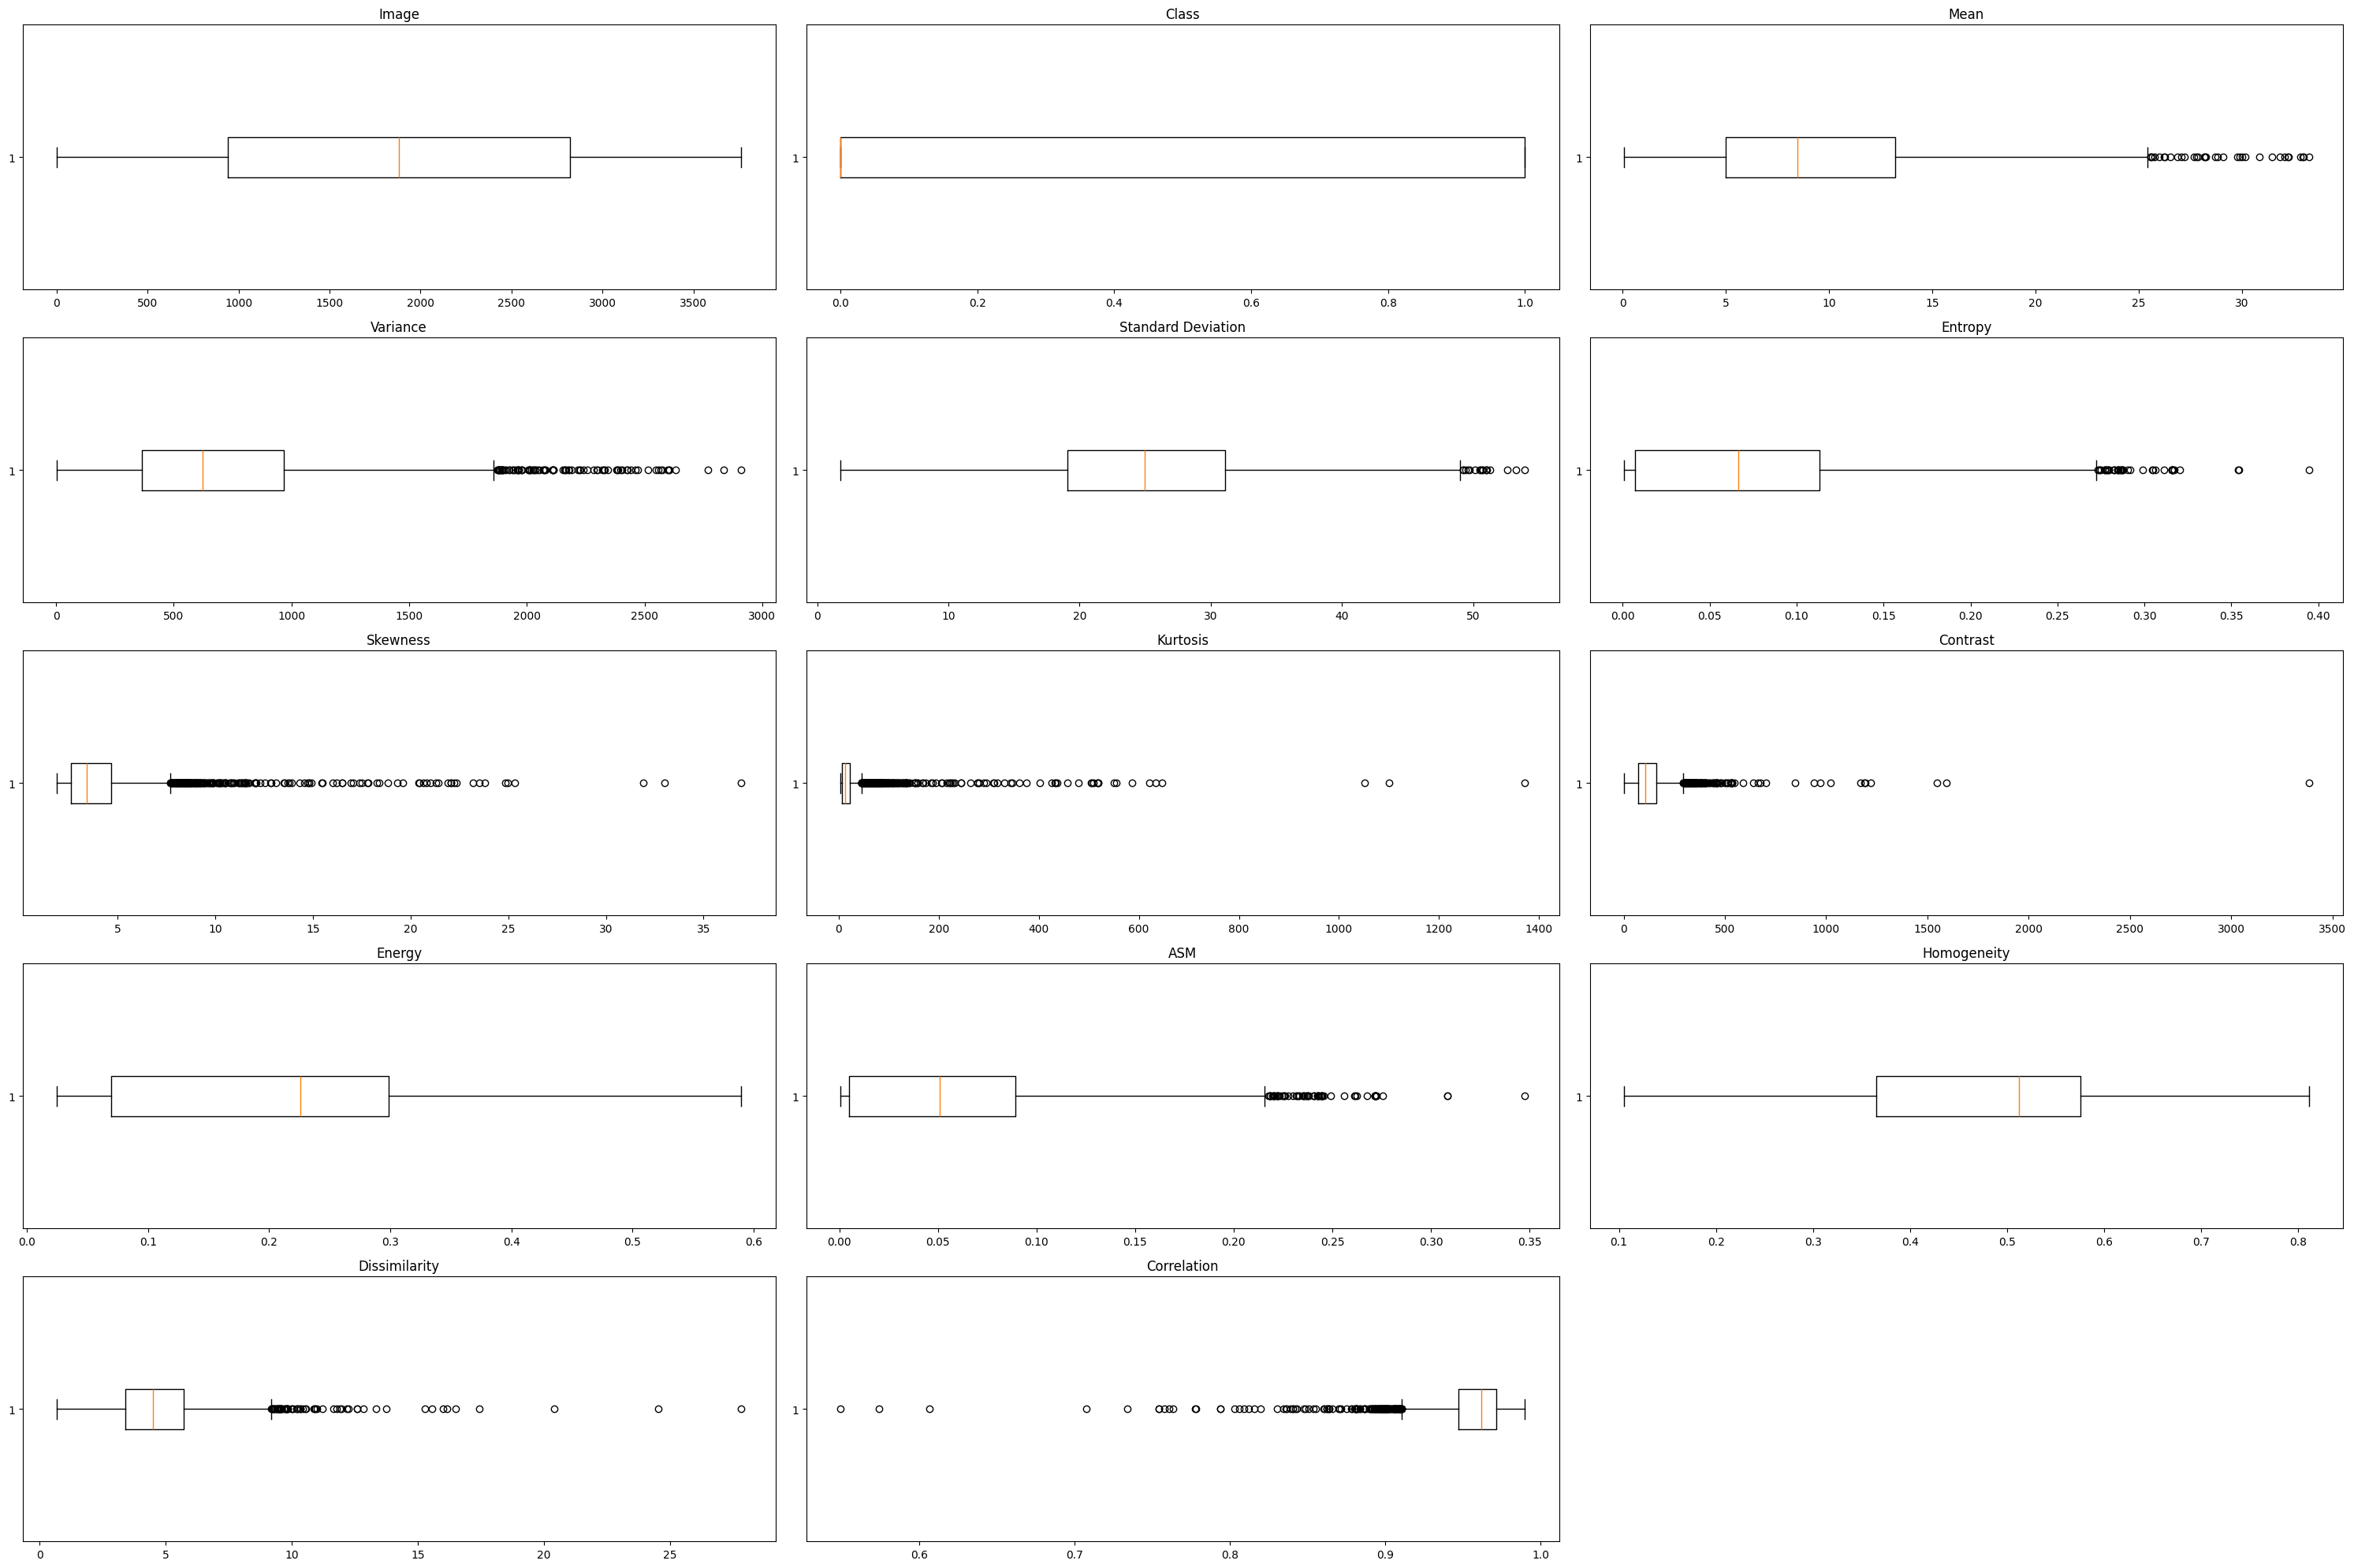

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Plot each column
plt.figure(figsize=(30, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)
    plt.boxplot(data[column], vert=False)
    plt.title(column)

plt.tight_layout()
plt.show()


Printing the number of outliears

In [ ]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

# total number of outliers for each numerical column
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

print("Total number of outliers in each column:")
for column in numerical_columns:
    total_outliers = count_outliers(data[column])
    print(f"{column}: {total_outliers}")
    print('-' * 10)


Total number of outliers in each column:
Image: 0
----------
Class: 0
----------
Mean: 34
----------
Variance: 92
----------
Standard Deviation: 17
----------
Entropy: 43
----------
Skewness: 233
----------
Kurtosis: 355
----------
Contrast: 148
----------
Energy: 0
----------
ASM: 64
----------
Homogeneity: 0
----------
Dissimilarity: 67
----------
Correlation: 150
----------


---


*   The outliears values are way too little  considoring the size of the dataset




## visualizing the distributions

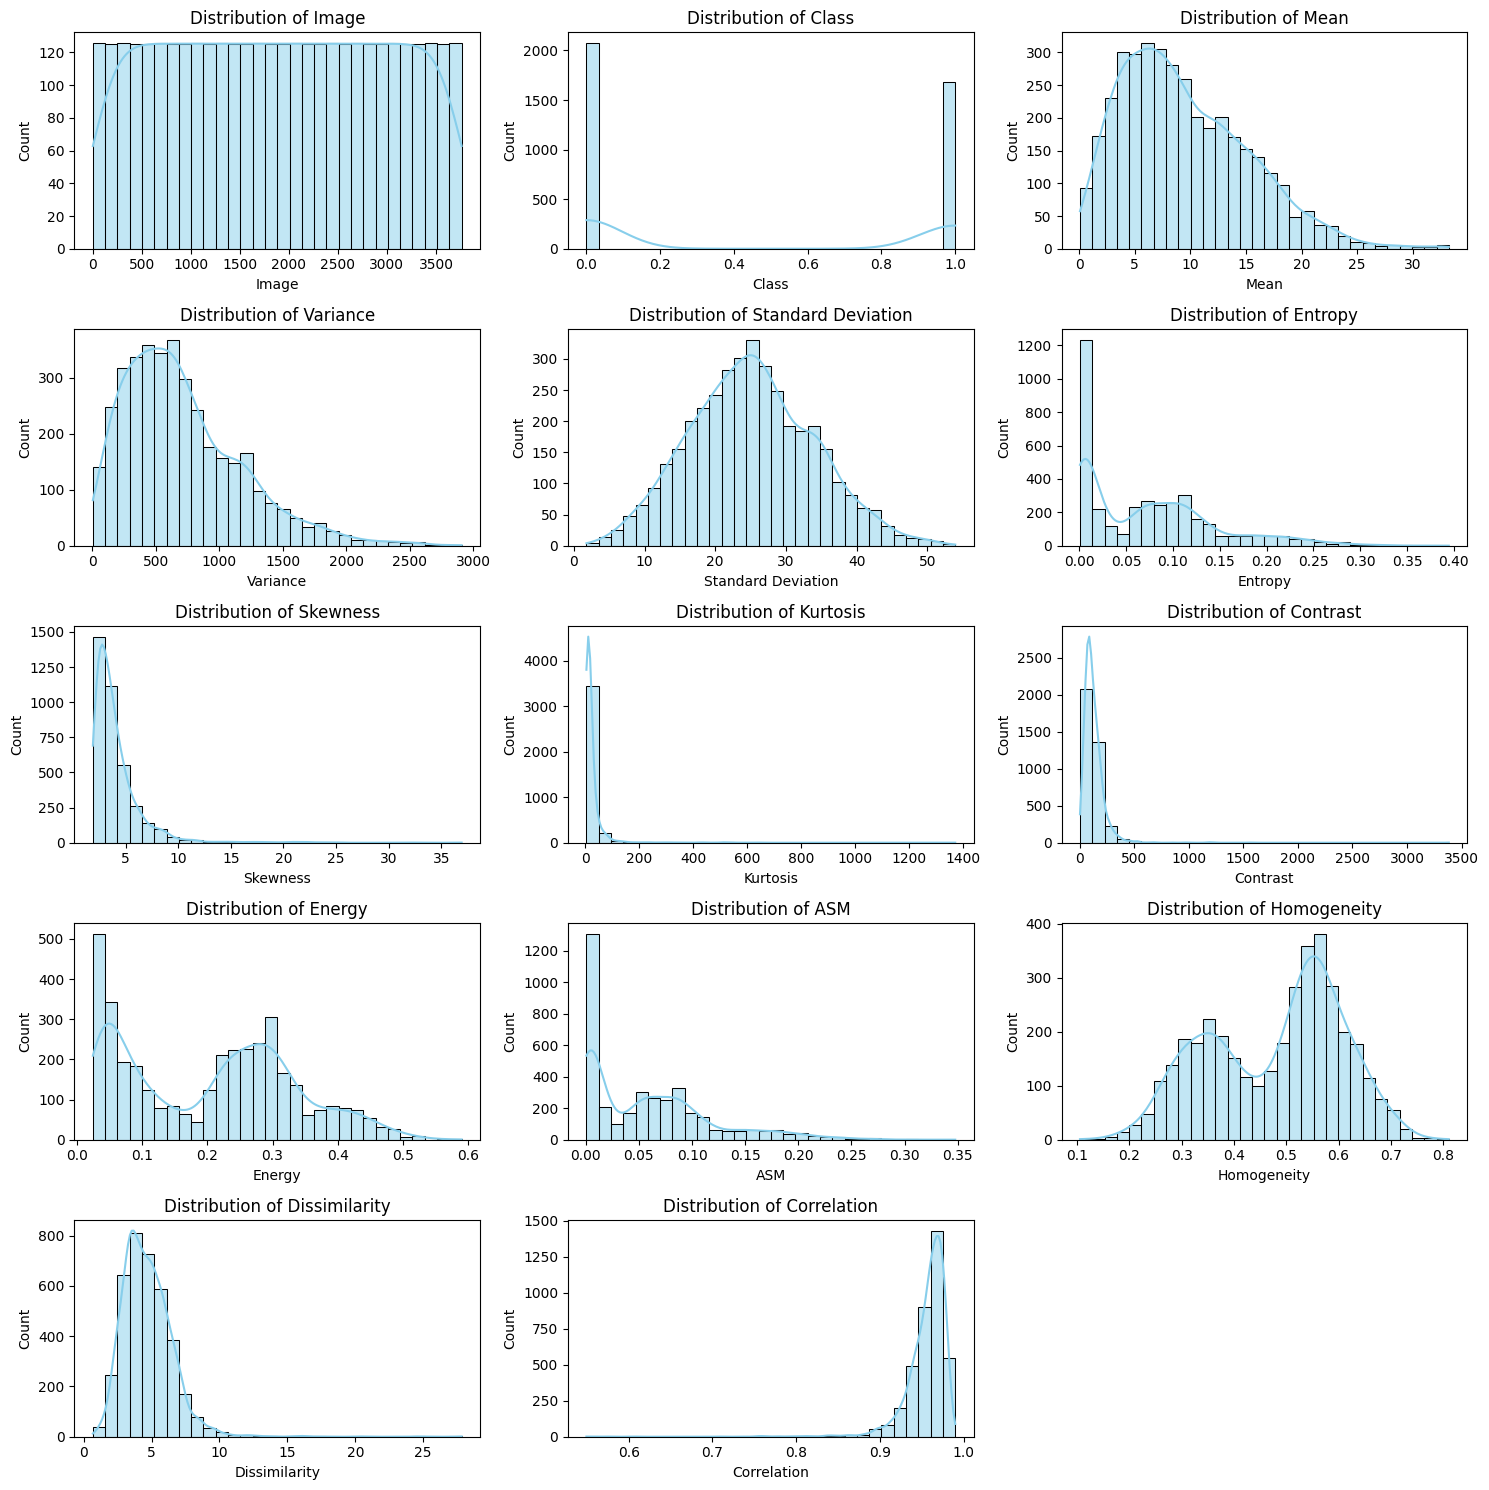

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Plot the distributions
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)  # Create a grid of subplots
    sns.histplot(data[column], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()


## Plotting bar graphs

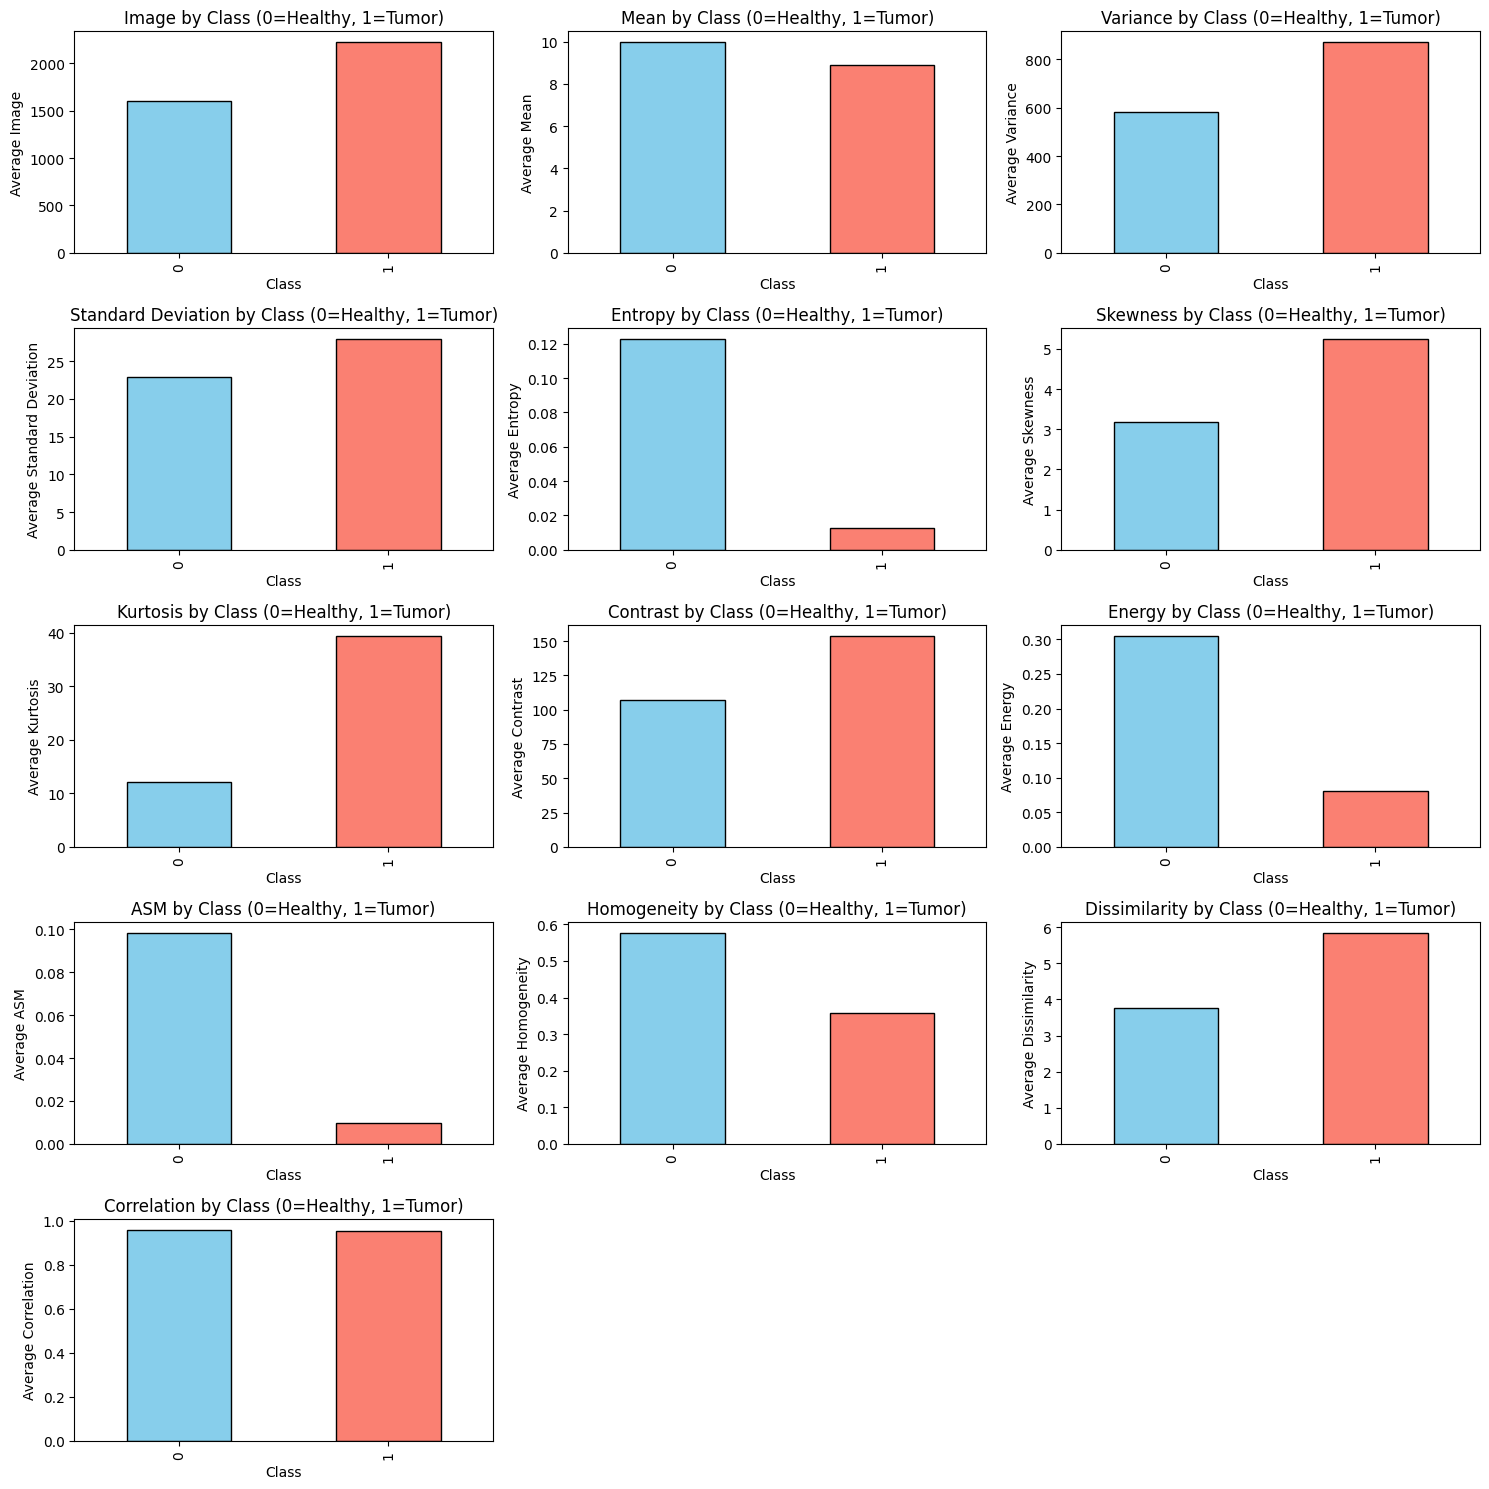

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Exclude the 'Class' column from numerical columns
numerical_columns = numerical_columns.drop('Class')

# Plot bar graphs for each numerical column grouped by 'Class'
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)
    data.groupby('Class')[column].mean().plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
    plt.title(f"{column} by Class (0=Healthy, 1=Tumor)")
    plt.xlabel("Class")
    plt.ylabel(f"Average {column}")

plt.tight_layout()
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   int64  
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 411.6 KB


In [ ]:
data.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation
0,1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939
1,2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834
2,3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014
3,4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189
4,5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789


## Feature Scaling

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Print the first 5 rows of the scaled dataset
print("First 5 rows of the scaled dataset:")
print(data.head())


First 5 rows of the scaled dataset:
      Image  Class      Mean  Variance  Standard Deviation   Entropy  \
0  0.000000    0.0  0.194705  0.212023            0.443074  0.274801   
1  0.000266    0.0  0.261489  0.276124            0.510114  0.674843   
2  0.000532    1.0  0.219003  0.392326            0.614200  0.001487   
3  0.000798    1.0  0.177300  0.329007            0.559750  0.001513   
4  0.001064    0.0  0.218223  0.249840            0.483677  0.370574   

   Skewness  Kurtosis  Contrast    Energy       ASM  Homogeneity  \
0  0.068211  0.010937  0.028236  0.475410  0.246092     0.603108   
1  0.052278  0.007693  0.017951  0.797096  0.648383     0.773800   
2  0.090618  0.016478  0.023280  0.012719  0.001173     0.230760   
3  0.108202  0.021559  0.043805  0.012908  0.001192     0.196137   
4  0.068403  0.011067  0.050836  0.564860  0.338854     0.560862   

   Dissimilarity  Correlation  
0       0.139694     0.981764  
1       0.093527     0.997417  
2       0.195261     0.972

## Plotting coreleation Heatmap

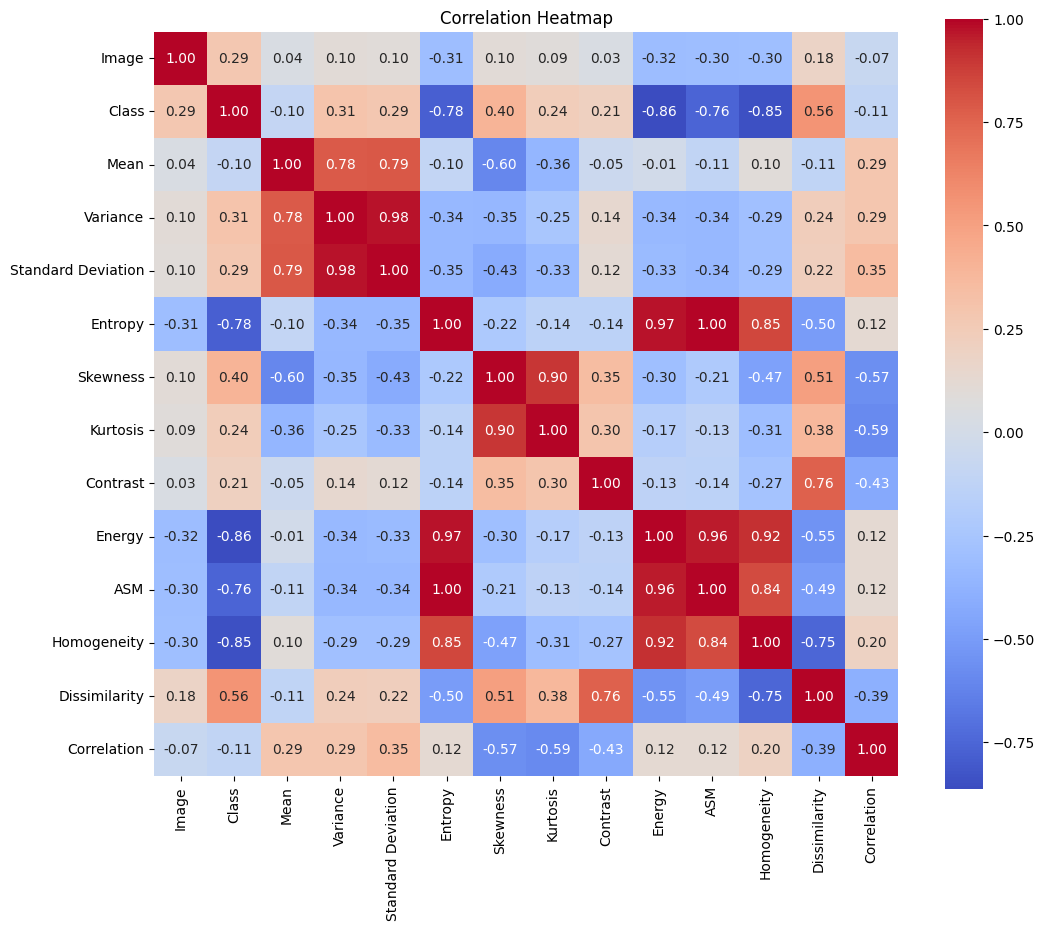

In [ ]:
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap")
plt.show()


* Key Predictive Features: Features like Entropy, Homogeneity, and Energy show strong correlations with the tumor classification (Class), making them critical for model predictions

# Traning

## Deviding traning and testing data

In [ ]:
# Separate
X = data.drop('Class', axis=1)  # Features
y = data['Class']              # Target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print
print("Training set shape (X_train):", X_train.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Testing set shape (y_test):", y_test.shape)


Training set shape (X_train): (3009, 13)
Training set shape (y_train): (3009,)
Testing set shape (X_test): (753, 13)
Testing set shape (y_test): (753,)


## Model Traning


Best Parameters for Traning

## Random-Forest-Classifier

In [ ]:
# Select the first 100 columns
X_train_subset = X_train[:100]
y_train_subset = y_train[:100]


# Define the parameter grid
rf_param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [3, 5, 10],
    "max_features": ["sqrt"], #splitting of the note
    "min_samples_split": [2, 5]
}

# Initialize the GridSearchCV
rf_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                       param_grid=rf_param_grid,
                       cv=5, scoring='accuracy', verbose=2)

# Fit the GridSearchCV
rf_grid.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Random Forest:", rf_grid.best_params_)
print("Best Score for Random Forest:", rf_grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_

## Gradient-Boosting-Classifier

In [ ]:
# Define parameter grid
gb_param_grid = {
    "n_estimators": [50, 100],
    "learning_rate": [0.1, 0.2],
    "max_depth": [3, 5],
    "subsample": [0.9]
}

# Initialize the GridSearchCV
gb_grid = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                       param_grid=gb_param_grid,
                       cv=5, scoring='accuracy', verbose=2)

# Fit the GridSearchCV
gb_grid.fit(X_train_subset, y_train_subset)

# Best parameters and score
print("Best Parameters for Gradient Boosting:", gb_grid.best_params_)
print("Best Score for Gradient Boosting:", gb_grid.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learni

## Ada=Boosting-Classifier

In [ ]:

# Define parameter grid
ada_param_grid = {
    "n_estimators": [50, 100],
    "learning_rate": [0.1, 0.2]
}

# Initialize the GridSearchCV
ada_grid = GridSearchCV(estimator=AdaBoostClassifier(random_state=42),
                        param_grid=ada_param_grid,
                        cv=5, scoring='accuracy', verbose=2)

# Fit the GridSearchCV
ada_grid.fit(X_train_subset, y_train_subset)

# Best parameters and score
print("Best Parameters for AdaBoost:", ada_grid.best_params_)
print("Best Score for AdaBoost:", ada_grid.best_score_)



Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.3s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.0s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.3s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.3s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.3s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.2, n_es

## XGB-Classifier

In [ ]:

# Define parameter grid
xgb_param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [3, 5],
    "learning_rate": [0.1, 0.2],
    "colsample_bytree": [0.7, 1.0]
}

# Initialize the RandomizedSearchCV
xgb_random = RandomizedSearchCV(estimator=XGBClassifier(random_state=42),
                                param_distributions=xgb_param_grid,
                                n_iter=10, cv=3, scoring='accuracy', verbose=2, random_state=42)

# Fit the RandomizedSearchCV
xgb_random.fit(X_train_subset, y_train_subset)

# Best parameters and score
print("Best Parameters for XGBoost:", xgb_random.best_params_)
print("Best Score for XGBoost:", xgb_random.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_ra

In [ ]:

print("XGBoost version:", xgb.__version__)
print("Scikit-learn version:", sklearn.__version__)


XGBoost version: 1.7.6
Scikit-learn version: 1.3.0


## Traning Models

To train validate and repotys

In [ ]:
def all(model):
    model.fit(X_train,y_train.astype(int))
    pre = model.predict(X_test)
    print(confusion_matrix(pre, y_test.astype(int)))
    print(classification_report(pre, y_test.astype(int)))
    print('score_test = ', model.score(X_test, y_test.astype(int))*100)
    print('score_train = ', model.score(X_train, y_train.astype(int))*100)

## Random Forest

In [ ]:
# Best Parameters for Random Forest:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
model_1 = RandomForestClassifier(n_estimators=100, max_depth=10,max_features='sqrt',
    min_samples_split=2)
all(model_1)

[[415  10]
 [  4 324]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       425
           1       0.97      0.99      0.98       328

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

score_test =  98.14077025232405
score_train =  99.83383183781987


## Gradient Boosting

In [ ]:
model_2 = GradientBoostingClassifier(n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    max_features='sqrt')
all(model_2)

[[415  10]
 [  4 324]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       425
           1       0.97      0.99      0.98       328

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

score_test =  98.14077025232405
score_train =  99.23562645397142


## Ada Boosting

In [ ]:
model_3 = AdaBoostClassifier()
all(model_3)

[[415   7]
 [  4 327]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       422
           1       0.98      0.99      0.98       331

    accuracy                           0.99       753
   macro avg       0.98      0.99      0.99       753
weighted avg       0.99      0.99      0.99       753

score_test =  98.53917662682603
score_train =  99.80059820538385


## XGB

In [ ]:
model_4 = XGBClassifier(n_estimators=100,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8 )
all(model_4)

[[418  11]
 [  1 323]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       429
           1       0.97      1.00      0.98       324

    accuracy                           0.98       753
   macro avg       0.98      0.99      0.98       753
weighted avg       0.98      0.98      0.98       753

score_test =  98.40637450199203
score_train =  99.53472914589565


# Ensemble Model

In [ ]:
clf1 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=4, max_features=6)
clf2 = XGBClassifier(max_depth=4, learning_rate=0.02, n_estimators=50, random_state=42)
clf3 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.03, random_state=42, max_depth=3)
clf4 = AdaBoostClassifier(n_estimators=100, learning_rate=0.03)

# Combing predictions from multiple classifiers

Voting Classifier

In [ ]:
v_clf = VotingClassifier(
    estimators=[
        ("RandomForest", clf1),
        ("XGB", clf2),
        ("GradientBoosting", clf3),
        ("AdaBoost", clf4)
    ],
    voting="soft"
)

Traning

In [ ]:
# Fit the voting classifier
v_clf.fit(X_train, y_train.astype(int))

# Predictions and report for the voting classifier
predictions = v_clf.predict(X_test)
print("Voting Classifier - Confusion Matrix:\n", confusion_matrix(y_test.astype(int), predictions))
print("Voting Classifier - Classification Report:\n", classification_report(y_test.astype(int), predictions))
print('Voting Classifier Test Score = ', v_clf.score(X_test, y_test.astype(int)) * 100)

Voting Classifier - Confusion Matrix:
 [[418   1]
 [ 12 322]]
Voting Classifier - Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       419
           1       1.00      0.96      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

Voting Classifier Test Score =  98.27357237715803


## MOdel Evaluation

In [ ]:
y_pred = v_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print('Test Score = ', v_clf.score(X_test, y_test.astype(int)) * 100)
print('Train Score = ', v_clf.score(X_train, y_train.astype(int)) * 100)

Confusion Matrix:
 [[418   1]
 [ 12 322]]
Test Score =  98.27357237715803
Train Score =  98.8035892323031


In [ ]:
v_clf.score(X_test , y_test)

0.9827357237715804

In [ ]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)*100}')

cm = confusion_matrix(y_test, y_pred)
print(cm)

tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]

print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

print(f'precision_score1: {precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

accuracy_score: 98.27357237715803
[[418   1]
 [ 12 322]]
True Positive: 322
True Negative: 418
False Positive: 1
False Negative: 12
precision_score1: 0.9969040247678018
precision_score2: 0.9969040247678018
recall_score: 0.9640718562874252
recall_score: 0.9640718562874252


## AUC and ROC Curves

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

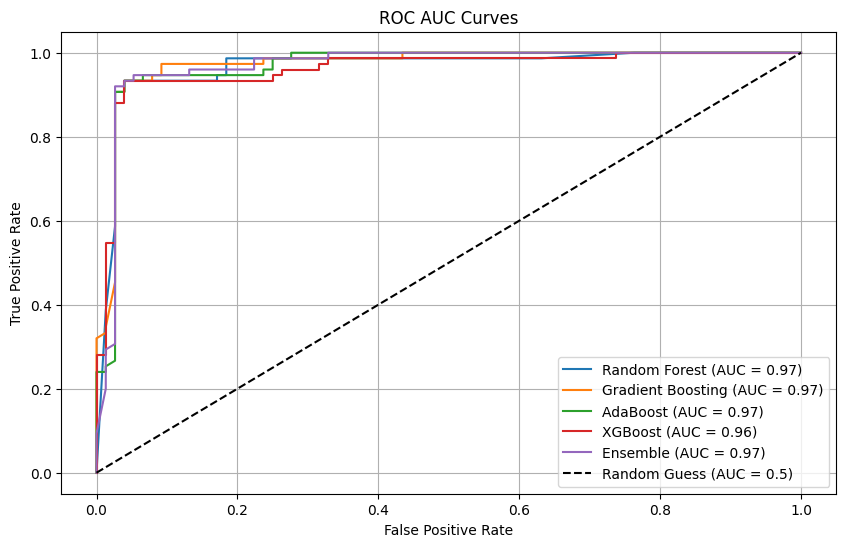

In [ ]:

X, y = make_classification(n_samples=753, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define
model_1 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model_2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_3 = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model_4 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train all models
models = [
    ("Random Forest", model_1),
    ("Gradient Boosting", model_2),
    ("AdaBoost", model_3),
    ("XGBoost", model_4),
    ("Ensemble", v_clf)
]

for name, model in models:
    model.fit(X_train, y_train)

# Function to plot ROC curves
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 6))

    for name, model in models:
        # Get predicted probabilities
        y_proba = model.predict_proba(X_test)[:, 1]

        # Compute FPR, TPR, and threshold values
        fpr, tpr, _ = roc_curve(y_test, y_proba)

        # Compute AUC
        auc_score = roc_auc_score(y_test, y_proba)

        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

    # Plot the random guess line
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC AUC Curves")
    plt.legend()
    plt.grid()
    plt.show()

# Call the plotting function
plot_roc_curve(models, X_test, y_test)
